<a id="week0"></a>
<h1 style="color:#00A6D6;">Introduction to Quantum Cryptography - Jupyter Notebooks</h1>
<h2 style="color:#00A6D6;">Chapter 1: Background Material</h2>

Welcome to the lab exercises in Julia. These notebooks are meant to help you study the material by performing many calculations in an easy and intuitive manner - in short, by playing around!

Each notebook consists out of two types of parts:

First off, there are parts where Julia is used to make certain calculations and visualize the outcomes: The computer programming makes it possible to calculate and visualize things that are otherwise difficult. You may wish to change the examples, or extend them to perform other calculations that help you become familiar with the material in our class and beyond. 

Secondly, each notebook has a few homework exercises marked "Exercises". These are calculations that we would definitely like you to perform. The answers to these (..? are available on the website maybe?)

### If you have never used a Julia Jupyter sheet before, we recommend you to begin with the "Getting Started" notebook. 

Ready? Then let's get started! Click shift-enter in the box below to load the first snippet of Julia! The first time you do this, Julia will compile several packages, which may generate many info and warning messages. 

In [1]:
# load functions/globals used throughout the notebook
include("source/main.jl") ;

WebIO._IJuliaInit()

* <a href="#single_qubit"> The Single Qubit </a>

* <a href="#two_qubits"> Two Qubits </a>

* <a href="#measurements"> Measurements </a>

* <a href="#transformations"> Unitary Transformations </a>

* <a href="#bloch_sphere"> Bloch Sphere </a>

------
<a id="single_qubit"></a>
<h2 style="color:#00A6D6;">The Single Qubit</h2>

Let's start with a single qubit! As you've learned in the book already, the word qubit refers to a quantum bit. 

Throughout we will use the bra-ket notation, the quantum information way of writing down vectors. Let's remember what the two vectors corresponding to the two classical bits 0 and 1 look like.

$$\left| 0 \right\rangle := \begin{pmatrix}1 \\ 0\end{pmatrix}, \quad \text{and} \quad \left| 1 \right\rangle := \begin{pmatrix}0 \\ 1\end{pmatrix}.$$

Let's define them in Julia:

In [2]:
# The vector corresponding to |0>
v0 = [1; 0]

2-element Vector{Int64}:
 1
 0

In [3]:
# The vector corresponding to |1>
v1 = [0; 1]

2-element Vector{Int64}:
 0
 1

Accordingly, we can describe the state $\left| \psi \right\rangle$ of a qubit in general by

$$\left| \psi \right\rangle = \alpha \left| 0 \right\rangle + \beta \left| 1 \right\rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \:.$$

The parameters $\alpha$ and $\beta$ are amplitudes. Let's try constructing such a vector for some values of $\alpha$ and $\beta$ in Julia:

In [4]:
# Amplitudes
alpha = 1/sqrt(2); # note, by ending a line of Julia with a semi-colon output is supressed
beta = 1/sqrt(2);  # try adding a semi-colon to the last line of this cell to see what happens

# The qubit psi corresponding to such amplitudes
psi = alpha * v0 + beta * v1

2-element Vector{Float64}:
 0.7071067811865475
 0.7071067811865475

---

<a id='normalization'></a>
<h4 style="color:#00A6D6;">Normalization</h4>

Remember that for $\left| \psi \right\rangle$ to be a valid qubit we require $\left| \psi \right\rangle$ to be normalized. For the inner product of $\left| \psi \right\rangle$ with itself&mdash;in bra-ket notation as $ \langle \psi \:|\: \psi \rangle$&mdash;it must be that

$$ \langle \psi \:|\: \psi \rangle = \lvert\alpha\rvert^2 + \lvert\beta\rvert^2 = 1$$

To make this more explicit recall that a bra $\left\langle \psi \right|$ denotes the complex conjugate of the ket $\left| \psi \right\rangle$:

$$\left\langle \psi \right|:= \begin{pmatrix} \alpha \\ \beta \end{pmatrix}^{*T} = \begin{pmatrix} \alpha^* , \beta^* \end{pmatrix} \:.$$ 

Let's expand this in terms of the vector: 

$$\langle \psi \:|\: \psi \rangle = \begin{pmatrix} \alpha^*\:, \beta^* \end{pmatrix} \cdot \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \alpha \cdot \alpha^* + \beta \cdot \beta^* = \lvert\alpha\rvert^2 + \lvert\beta\rvert^2 = 1$$

Let's check whether the qubit psi we have defined above is normalized!

In [5]:
# In Julia, this gives us the bra of a vector. Let's print it
psi'

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 0.707107  0.707107

In [6]:
# Let's now check normalization - up to numerical accuracy!
psi' * psi

0.9999999999999998

Be careful that the bra is the <b>conjugate</b> transpose - and not merely the transpose! To see this, let's construct a complex vector, where "im" is the Julia way of writing the complex i.

In [7]:
# Let's define a complex vector
alpha = 1/sqrt(2);
beta = im * 1/sqrt(2);

# Let's display the vector
psi = alpha * v0 + beta * v1

2-element Vector{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.7071067811865475im

In [8]:
# And let's display it's bra: the complex conjugate
psi'

1×2 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 0.707107-0.0im  0.0-0.707107im

As an exercise for yourself, go and adapt the Julia code below to test whether $$|\Psi\rangle = \alpha |0\rangle + \beta |1\rangle$$ with $\alpha = 1/3$ and $\beta = 2/3$ is normalized! 

In [9]:
# First, let's define again the amplitudes
alpha = ...;
beta = ...;

# Construct the vector psi
psi = alpha * v0 + beta * v1;

# Compute the inner product <psi|psi>
psi'*psi

LoadError: syntax: invalid identifier name "..."

---

<h4 style="color:#00A6D6;">A real valued example</h4>

Remember that $\alpha$ and $\beta$ are in general complex numbers! Let us however assume here that $\alpha$ and $\beta$ have a real value</b>. The normalization condition thus becomes $\alpha^2 + \beta^2 = 1$. 

To visualize such a qubit, let us make the following parametrization 

$$\alpha = \cos\theta \quad \text{and} \quad \beta = \sin\theta$$

and see how the state vector can be represented in a 2D plot.

<b> click in the code block below and press shift+enter, it might take a moment before the resulting image is loaded</b>.

You will see a slider appear which lets you set $\theta$. You will see a plot of the corresponding state vector appear. 

$$\left| \psi(\theta) \right\rangle = \alpha \left| 0 \right\rangle + \beta \left| 1 \right\rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \:.$$

Use the slider and vary $\theta$, you will see the state vector representation vary accordingly. As an exercise for yourself, go and investigate the angles for the elements $|0\rangle$ and $|1\rangle$ of the standard basis, and the vectors defining the Hadmard basis:

$$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle).$$

$$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle).$$

In [10]:
single_state_vector_plot() # load the interactive plot.

sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 25, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(13), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001cc97071560, Task (runnable) @0x000001cc97071560), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 141733920768)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-180\",\"-165\",\"-150\",\"-135\",\"-120\",\"-105\",\"-90\",\"-75\",\"-60\",\"-45\

We have already seen above how to express $|+\rangle$ and $|-\rangle$ in terms of the standard Basis $|0\rangle$, $|1\rangle$ above. Since the Hadmard basis is also a basis, we should of course also be able to write $|0\rangle$ and $|1\rangle$ in terms of $|+\rangle$ and $|-\rangle$. 

Can you guess by looking at the picture above? Go and find the coefficients $\alpha_0, \beta_0$ and $\alpha_1,\beta_1$ visually:

$$|0\rangle = \alpha_0 |+\rangle + \beta_0 |-\rangle$$
$$|1\rangle = \alpha_1 |+\rangle + \beta_1 |-\rangle$$.

Verify your answers using the Julia code below!

In [11]:
# Let's first define the plus and minus state
plus = 1/sqrt(2) * (v0 + v1);
minus = 1/sqrt(2) * (v0 - v1);

# Let's first make the v0 vector by combining plus and minus
alpha0 = ...;
beta0 = ...;
newV0 = alpha0 * plus + beta0 * minus

LoadError: syntax: invalid identifier name "..."

In [12]:
# And then the new one vector
alpha1 = ...;
beta1 = ...;
newV1 = alpha1 * plus + beta1 * minus

LoadError: syntax: invalid identifier name "..."

<h3 style="color:#00A6D6;">Exercise 1</h3>

We're now ready for the first exercise. Consider $$\left| b_0 \right\rangle = \sqrt{\frac{1}{3}} \left| 0 \right\rangle + \sqrt{\frac{2}{3}} \left| 1 \right\rangle$$

What real-valued vectors are orthogonal to this vector? In other words given $\left| b_0 \right\rangle$ which $\left| b_1 \right\rangle$ satisfy

$$ \left\langle b_1 | b_0 \right\rangle = 0 \:?$$

<b>Your task is to find parameters $\alpha_1 \geq 0$ and $\beta_1$ such that

$$\left| b_1 \right\rangle = \begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix}$$

is orthogonal to $\left| b_0 \right\rangle$ </b>.

Take a guess, use Julia to find the vector for you, or compute it by hand! By clicking in the code box just below you can fill in values for $\alpha_1$ and $\beta_1$ and calculate $ \left\langle b_1 | b_0 \right\rangle$ to see how you are doing.

To start you off we have set $\alpha_1$ and $\beta_1$ to $\sqrt{\frac{1}{2}}$ and $\sqrt{\frac{1}{2}}$ respectively.

In [13]:
# First let's define the vector b0. We'll do this directly as a vector now
b0 = [sqrt(1/3) ; sqrt(2/3)];

# Set the amplitudes for b1. We'll put some funny amplitudes to start with...
alpha1 = sqrt(1/2);
beta1 = sqrt(1/2);

b1 = [alpha1; beta1]
###### 
println("You have entered |b_1> = ")
println("$alpha1 ⋅|0> + $beta1 ⋅|1> \n")
println("The inner product is \n  < b_0 | b_1 > = ")
println(b0'*b1)

You have entered |b_1> = 
0.7071067811865476 ⋅|0> + 0.7071067811865476 ⋅|1> 

The inner product is 
  < b_0 | b_1 > = 
0.9855985596534889


<h3 style="color:#00A6D6;">Exercise 2</h3>

Calculate the exact inner product of $$|+\rangle$$ and $$|0_y\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i |1\rangle)\:.$$ 

In other words, calculate 

$$ \langle 0_y | + \rangle$$

<b> Note: $|0_y\rangle$ is complex valued. </b>

<h4 style="color:#00A6D6;"> Supplement to Exercise 2</h4>

Below, you can enter the states $\lvert+\rangle$ and $|0_y\rangle$ in terms of coefficients $\alpha_1$, $\beta_1$ and $\alpha_2$, $\beta_2$:

$$ \lvert+\rangle = \begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix} \quad \lvert0_y\rangle = \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} $$ 

Note, in Julia, when it comes to complex numbers, one writes <pre> im </pre> instead of $i$. 


Thus $ z := x + i \cdot y $ translates to Julia code

<pre>
z = x + im*y
</pre> 


In [14]:
# |+> state
# replace the dots ".." with the appropriate coefficient
# we have filled in a value for β_2
# to show you how to fill in "im" times the square root of a fraction.
α_1 = .. 
β_1 = ..

plus = [α_1; β_1];

# |0>_y state
# replace the dots ".." with the appropriate coefficient
α_2 = ..
β_2 = im*sqrt(1/2)

y0 = [α_2; β_2];

# Compute the inner product - your code goes below!


LoadError: UndefVarError: `..` not defined

------
<a id="two_qubits"></a>
<h2 style="color:#00A6D6;">Two Qubits</h2>

Of course we will generally have more than one qubit! Remember the rule for combining the state of two distinct qubits into a two qubit state. Let $$\lvert \psi_i \rangle = \alpha_i \left| 0 \right\rangle + \beta_i \left| 1 \right\rangle = \begin{pmatrix} \alpha_i \\ \beta_i \end{pmatrix} $$

describe the state of the $i$-th qubit. 

We can describe the state of two qubits by taking the tensor product

$$\left| \psi_1 \right\rangle \otimes \left| \psi_2 \right\rangle = \Big(\alpha_1 \left| 0 \right\rangle + \beta_1 \left| 1 \right\rangle \Big) \otimes \Big(\alpha_2 \left| 0 \right\rangle + \beta_2 \left| 1 \right\rangle \Big) =$$

$$\begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix} \otimes \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} = \begin{pmatrix} \alpha_1 \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix}  \\ \beta_1 \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix}  \end{pmatrix} = \begin{pmatrix} \alpha_1 \cdot \alpha_2 \\ \alpha_1 \cdot \beta_2  \\  \beta_1 \cdot \alpha_2 \\ \beta_1 \cdot \beta_2 \end{pmatrix}  $$

To illustrate this, let us calculate the vector associated with $ \left| \psi_1 \right\rangle \otimes \left| \psi_2 \right\rangle$ given $\left| \psi_1 \right\rangle$ and $\left| \psi_2 \right\rangle$.

<b> click in the code block below and press shift+enter to see the results</b>.

In [15]:
# Let's first define the vectors, adapt the amplitudes to play around!

# Define Psi1
alpha1 = 1;
beta1 = 0;
psi1 = [alpha1; beta1];

# Define Psi2
alpha2 = 0;
beta2 = 1;
psi2 = [alpha2; beta2];

# Compute the tensor product
psiTwo = kron(psi1,psi2)

4-element Vector{Int64}:
 0
 1
 0
 0

<h3 style="color:#00A6D6;">Exercise 3</h3>

Consider the following tensor product

$$ |0_y\rangle \otimes | + \rangle = \begin{pmatrix} c_1 \\ c_2 \\ c_3 \\ c_4 \end{pmatrix} $$

Calculate the coefficients $c_1$, $c_2$, $c_3$, $c_4$. 

Note, $|0\rangle_y$ has been defined in exercise 2.

<h4 style="color:#00A6D6;"> Supplement to Exercise 3 </h4>

Similar to the previous exercise you can check if your calculations went well using the code block just below :

You can enter the states $|0_y\rangle$ and $|+\rangle$ numerically in terms of coefficients $\alpha_1$, $\beta_1$ and $\alpha_2$, $\beta_2$ and calculate the associated tensor product.

In [16]:
# |0_y> state
# replace the dots ".." with the appropriate coefficient
# we have already filled in a correct value for β_1
# to demonstrate the syntax.
α_1 = ..
β_1 = im*sqrt(1/2)

y0 = [α_1; β_1];

# |+> state
# replace the dots ".." with the appropriate coefficient
α_2 = ..
β_2 = ..
z0 = [α_2; β_2];

# Compute the tensor product using the kron function
kron(y0,z0)

LoadError: UndefVarError: `..` not defined

-----
<a id="measurements"></a>
<h2 style="color:#00A6D6;">Measurements</h2>

Let's now measure some qubits! Chiefly, we will be measuring one - or more - qubits in a basis, where we will write the basis vectors as $|b_j\rangle$ for outcome "j". We saw in the book that the probability of obtaining a particular outcome is given by

$$P_{B=j} := \lvert \langle \psi \:|\: b_j \rangle \rvert^2 $$

<h4 style="color:#00A6D6;">Measuring a real-valued qubit</h4>

To gain some intuition, let us now again consider a qubit with real valued amplitudes. Remember, that we can parameterize such a qubit by an angle $\theta$

$$\left| \psi(\theta) \right\rangle = \cos\theta \left| 0 \right\rangle + \sin\theta \left| 1 \right\rangle = \begin{pmatrix} \cos\theta \\ \sin\theta \end{pmatrix} \:.$$

Let's now assume the basis that we measure in is also real valued where the outcome j=0 corresponds to the vector 

$$\left| b_0 \right\rangle = \begin{pmatrix} \cos\gamma \\ \sin\gamma \end{pmatrix} \:.$$

Let us visualize $\lvert \psi \rangle$ and $\lvert b_0 \rangle$ and calculate the corresponding probability $P_{B=0}$.

<b> Click in the code block below and press shift+enter, it might take a moment before the resulting image is loaded</b>.

You will see a sliders appear which lets you set $\theta$ and $\gamma$ (in degrees).

A plot will appear of $\lvert \psi \rangle$ and $\lvert b_0 \rangle$ - the solid part corresponds to the projection $ \big| \langle b_0 | \psi \rangle \big| \lvert b_0 \rangle$ - with $P_{B=0}$ written in the title.

Play around with the values of $\theta$ and $\gamma$ and see if you can understand what is going.

In [17]:
measurement_plot() # load the interactive plot.

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 25, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(13), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001cc97a11b30, Task (runnable) @0x000001cc97a11b30), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 35253904216064, 1241245573152)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-180\",\"-165\",\"-150\",\"-135\",\"-120\",\"-105\",\"-90\",\"-75\",

<h4 style="color:#00A6D6;">Global phase is irrelevant</h4>

Is there a difference between the qubit $|\psi\rangle$ and $|\phi\rangle = e^{i\gamma} |\psi\rangle$ for some angle $\gamma \in \mathbb{R}$? It turns out that such a global phase $e^{i\gamma}$ is irrelevant: there is no measurement that will give us any information on such a global phase - or, in other words - a global phase leads to no observable differences as we explain in detail in the lecture notes.

Let's try and convince ourselves below by means of some examples, by measuring a qubit, and the one with the global phase in the standard basis. Of course, you may wish to measure in other bases as well!

In [18]:
# Basis to measure in - default is the standard basis
b0 = [1; 0];
b1 = [0; 1];

# State to be measured - default is the plus state
psi = [1; 1]/sqrt(2);

# Set the global phase
gamma = 0.1;
phi = ℯ^(im * gamma) * psi
# Note: ℯ is the Natural Exponent(Euler's number).
# You can get in Julia by typing "\euler" and pressing tab

2-element Vector{ComplexF64}:
 0.7035741925769523 + 0.07059288589999414im
 0.7035741925769523 + 0.07059288589999414im

In [19]:
# Compute the outcome probabilities

val = b0'*psi;         # note, we compute the inner product by multiplying
                       # a row vector - here b0' (note the accent: b0' is the hermitian transposes of b0)
                       # and a column vector - here psi.
                       # This returns a 1-element array - here val. 
                       # val[1] returns the first and only entry of this array.

0.7071067811865475

In [20]:
p0 = abs(val[1])^2;    

val = b0'*phi;
p0Phase = abs(val[1])^2;

# Round and print
digits = 3;
p0 = round(p0,digits=digits);
p0Phase = round(p0Phase,digits=digits);

println("Without phase: p0 = ", p0, "\n")
println("With phase: p0Phase = ", p0Phase, "\n")

Without phase: p0 = 0.5

With phase: p0Phase = 0.5



<h3 style="color:#00A6D6;"> Exercise 4 </h3>

Consider the measurement basis 

$$ \{ \left| b_0 \right\rangle , \left| b_1 \right\rangle \} $$

with

$$ \left| b_0 \right\rangle = \sqrt{\frac{1}{3}} \left| 0 \right\rangle + \sqrt{\frac{2}{3}} \left| 1 \right\rangle$$

and 

$$\left| b_1 \right\rangle = \sqrt{\frac{2}{3}} \left| 0 \right\rangle - \sqrt{\frac{1}{3}} \left| 1 \right\rangle$$

For different states $ | \psi \rangle$ calculate probabilities of obtaining measurement outcomes 0 and 1. That is, compute the exact probabilities

$$ P(B=0) = p_0 = |\langle b_0 | \psi \rangle|^2 $$

and 

$$ P(B=1) =  p_1 = |\langle b_1 | \psi \rangle|^2 \:.$$

for each of the following states

$$ |\psi_1 \rangle = |0\rangle$$

$$ |\psi_2 \rangle = |+\rangle$$

$$ |\psi_3 \rangle = |-\rangle$$

In [21]:
# Feel free to use some code to check yourself

<h4 style="color:#00A6D6;"> Supplement no. 1 to Exercise 4 </h4>

The code below can be completed to calculate the answers to exercise 4 numerically.

In [22]:
# This is the basis we will measure in
b0 = [1/sqrt(3); sqrt(2/3)];
b1 = [sqrt(2/3); -1/sqrt(3)];

# Define the states
psi1 = [1; 0]; # write down the state vector for |0>
psi2 = [..; ..]; # write down the state vector for |+>
psi3 = [..; ..]; # write down the state vector for |->

# Write code to compute the probabilities - we'll do it for just one of the cases here.
val = b0'*psi1;
p0GivenPsi1 = abs(val[1])^2

LoadError: UndefVarError: `..` not defined

<h4 style="color:#00A6D6;"> Supplement no. 2 to Exercise 4 </h4>

It is helpful to visualize the measurement. Run the code below by clicking inside the block of code and pressing shift+enter. Again note that it may take a while for the image to appear.

You will see a 2D plot of $\left| b_0 \right\rangle$ and $\left| b_1 \right\rangle$ appear. 

Furthermore a selection box will appear which allows you to select $|\psi \rangle = |0\rangle$, $|\psi \rangle = |+\rangle$ or $|\psi \rangle = |-\rangle$.

Accordingly $|\psi \rangle$ is plot together with a numerical approximation of 

$$ p_0 = |\langle b_0 | \psi \rangle|^2$$

and 

$$ p_1 = |\langle b_1 | \psi \rangle|^2 \:.$$



In [23]:
projective_measurement_plot()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["state"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable(OrderedDict[OrderedDict{String, Any}("key" => "0", "val" => 1, "id" => "idpgx36nML"), OrderedDict{String, Any}("key" => "+", "val" => 2, "id" => "id3naKfAzS"), OrderedDict{String, Any}("key" => "-", "val" => 3, "id" => "idAgZZ1ndQ")]), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001ccbd498f90, Task (runnable) @0x000001ccbd498f90), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 1978211435008, 1978872418352)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(

<h3 style="color:#00A6D6;"> Measuring two qubits</h3>

Let's now imagine we have two qubits A and B. We will imagine that Alice holds qubit A and Bob holds qubit B. Evidently we might imagine that Alice measures her qubit in a basis... and also Bob could measure his qubit in a basis. What can we say about the overall measurement? 

Let's consider the example where Alice measures in the in the standard basis

$$ |0\rangle_A = |0\rangle \\ |1\rangle_A = |1\rangle$$

and Bob measures in in a "$\pi/8$ rotated" basis:

$$ |0_L\rangle_B = cos \frac{\pi}{8} |0\rangle + sin\frac{\pi}{8} |1\rangle \\ |1_L\rangle_B = -sin\frac{\pi}{8} |0\rangle + cos \frac{\pi}{8} |1\rangle$$

To see how this is a "$\pi/8$ rotated" basis consider the following picture, where we will actually plot the basis of Alice and Bob into the same plot even though they are of course on two different qubits.

<b> In case you see no image, click in the code block below and press shift+enter, it might take a moment before the resulting image is loaded</b>.

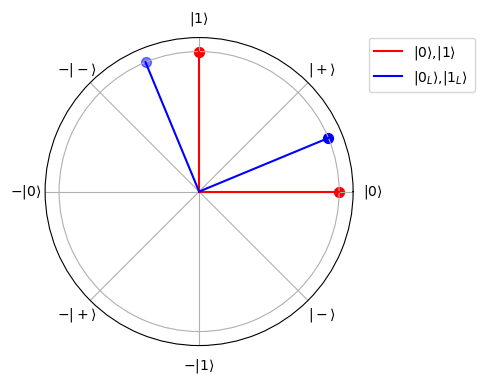

PyObject <matplotlib.legend.Legend object at 0x000001CCD4E63FD0>

In [24]:
pi8_rotated_basis_plot()

<h3 style="color:#00A6D6;">Exercise 5 </h3>

How can we describe the overall measurement if Alice measures in the basis $\{|0\rangle_A, |1\rangle_A\}$ and Bob - as defined just above - measures in the basis $\{|0_L\rangle_B,|1_L\rangle_B\}$  ?

Clearly we expect the overall measurement to have 4 outcomes, 0 or 1 for Alice, as well as 0 and 1 for Bob. This is indeed the case, and we can compute the outcome probabilities by taking the basis for Alice and the one for Bob, and constructing the basis for both qubits together.

This can be done using the tensor product. Find the <b> measurement basis for A and B combined_L</b>:

1. $|0\rangle_A \otimes |0_L\rangle_B$
2. $|0\rangle_A \otimes |1_L\rangle_B$
3. $|1\rangle_A \otimes |0_L\rangle_B$
4. $|1\rangle_A \otimes |1_L\rangle_B$

For clarity we have filled in the first coefficient for the first listed tensor product:

1. $|0\rangle_A \otimes |0_L\rangle_B = \begin{pmatrix} cos(\frac{\pi}{8}) \\ ? \\ ? \\ ? \end{pmatrix}$

Find such exact vector representations for the tensor products (1.), (2.), (3.) and (4.).

To check your answer, use the Julia snippet below!

In [25]:
# Let's first define Alice's basis. She measures in the standard basis
alice0 = [1 ; 0];
alice1 = [0 ; 1];

# Let's now define Bob's basis.
bob0 = [cos(pi/8); sin(pi/8)];
bob1 = [- sin(pi/8); cos(pi/8)];

# Compute the combined basis - your code goes here!
cb_1 = kron(alice0,bob0)
cb_2 = ...
cb_3 = ...
cb_4 = ...

# To print, let's round 
digits = 3;
cb_1r = round(cb_1,digits);
cb_2r = round(cb_2,digits);
cb_3r = round(cb_3,digits);
cb_4r = round(cb_4,digits);

println("combined basis (1.): $cb_1r^T \n")
println("combined basis (2.): $cb_2r^T \n")
println("combined basis (3.): $cb_3r^T \n")
println("combined basis (4.): $cb_4r^T \n")

LoadError: syntax: invalid identifier name "..."

<h3 style="color:#00A6D6;"> Exercise 6 </h3>

Suppose now that Alice and Bob measure in the basis we constructed above. And let's suppose they measure the EPR pair 

$$ | \Phi \rangle = \frac{ |0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle}{\sqrt{2}} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}\:.$$

What are the probabilities 

$$ p_{xy} = \Big|\big( \langle x \rvert_A \otimes \langle y_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$$

of Alice getting outcome $x \in \{0,1\}$ and Bob outcome $y \in \{0,1\}$ rounded to 3 digits ?

In other words, what are 

1. $ p_{00} = \Big|\big( \langle 0\rvert_A \otimes \langle 0_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$
2. $ p_{01} = \Big|\big( \langle 0\rvert_A \otimes \langle 1_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$
3. $ p_{10} = \Big|\big( \langle 1\rvert_A \otimes \langle 0_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$
4. $ p_{11} = \Big|\big( \langle 1\rvert_A \otimes \langle 1_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$

rounded to 3 digits? 

Help yourself by making use of some code, we have made a draft below.

In [26]:
## in case you have succesfully ran the previous code block
## the combined basis cb_1 till cb_4 should be defined.

## Then let us define the state to be measured

Phi = [1;0;0;1]/sqrt(2);

# The probabilities follow from the squared inner product
# betweeh Phi and the measurement basis 
p_00 = abs(Phi'*cb_1).^2
p_01 = ...
p_10 = ...
p_11 = ...

# We will round the probabilities to 3 digits
digits = 3;

p_00 = round(p_00,digits=digits)
p_01 = ...
p_10 = ...
p_11 = ...

println("p_00: $p_00 \n")
println("p_01: $p_01 \n")
println("p_10: $p_10 \n")
println("p_11: $p_11 \n")

LoadError: syntax: invalid identifier name "..."

-----
<a id="transformations"></a>
<h2 style="color:#00A6D6;">Unitary Transformations</h2>

You have learned in the book that transformations on qubits, are given by unitary transformations. Let's investigate such transformations in detail. 

As a warmup let's just define a matrix - the Hadamard transform, and verify that its indeed a unitary

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$


In [27]:
# Define the Hadamard transform as a matrix in Julia
tH = [1 1;1 -1]/sqrt(2)

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [28]:
# Let's now check whether the transformation is unitary by computing U' * U
U = tH;
U' * U

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [29]:
# And also U * U'
U * U'

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

As an exercise, you may wish to convince yourself that the Pauli matrices: X, Z and Y - as defined below in the Julia code - are also unitary!

In [30]:
# Pauli X
pX = [0 1;1 0];

# Pauli Z
pZ = [1 0;0 -1];

# Pauli Y
pY = im * pX * pZ;

Let us vizualize the effect of a unitary transformation $U$ on $\lvert \psi \rangle$. What does $U|\psi\rangle$ look like?

$$\lvert \psi(\theta) \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \cos\theta \\ \sin{\theta} \end{pmatrix} $$


<b> Click in the code block below and press shift+enter.</b>

You will see a slider appear which lets you pick $\theta$.

The state vector $\lvert \psi(\theta) \rangle$ is plotted accordingly.

Click the check-box to apply the unitary transformation (by default the Hadmard transformation) to $\lvert \psi(\theta) \rangle$ and you will see the resulting state vector $U \lvert \psi(\theta) \rangle$ plotted as well.

Vary $\theta$ to see how $U \lvert \psi(\theta) \rangle$ and $\lvert \psi(\theta) \rangle$ change accordingly.

In [31]:
U = tH                    # We entered tH as a default. 
                          # You could also input other real-valued unitaries, for example pX or pZ. 

unitary_transform_plot(U) # Note, complex valued state vectors are not supported     

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 25, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(13), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001cc983e0010, Task (runnable) @0x000001cc983e0010), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (3, 140711719077888, 4294967297)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-180\",\"-165\",\"-150\",\"-135\",\"-120\",\"-105\",\"-90\",\"-75\",\"

<h3 style="color:#00A6D6;">Exercise 7</h3>

Let's imagine that Alice wants to send a bit $x \in \{0,1\}$ to Bob. Having gone all quantum, however, Alice has lost all means for classical communication. Unfortunately, Alice and Bob also have quite funny quantum devices.

Concretely, Alice has a device that can only prepare the state $|+\rangle$. Thankfully, however, she can apply one of two unitaries $U_0$ and $U_1$ of her choosing transforming her state to $|\psi_x\rangle = U_x |+\rangle$. To be fair, we at least allow Alice some control over her circuit so that Alice can decide to apply $U_x$ depending on her input bit $x\in\{0,1\}$. 

<img src="source/figure_exercise_7.svg">

Alice can now send her state $|\psi_x \rangle$ to Bob. Bob can only measure in the standard basis, and will take his measurement outcome $b \in \{0,1\}$ to be the value of $x$. 

Your goal in this exercise is to come up with a protocol so that Alice can communicate $x$ to Bob, no matter whether $x=0$ or $x=1$. Concretely, your goal is to determine what transformations $U_0$ and $U_1$ she applies for the cases $x=0$, and $x=1$. 

In other words we ask you to find two unitaries $ U_0$ and $U_1$ that Alice can apply such that the probability that Bob obtains measurement outcome $B=x$ is given by

$$ P(B=x) = \big| \langle x \: \lvert \: U_x \: \rvert \: + \rangle \big|^2 = 1 $$

---

You can check if you have found two such unitaries by making use of the code block just below.

Enter $U_0$ and $U_1$ as is described and you will see the associated $p_0$ and $p_1$.

In [32]:
## enter values for U_0 - as a default we have taken the identity matrix
U_0 = [1 0;0 1];

## enter the second unitary U_1 - as a default we have taken the identity matrix
U_1 = [1 0;0 1];

# Let's define the standard basis and the plus state
v0 = [1; 0];
v1 = [0; 1];
plus = [1; 1]/sqrt(2);

## let's compute the outcome probabilities if Alice applies U_0

# first, let's compute the output vector by applying the unitary transformation
outVec = U_0 * plus;

# then the probability that Bob measures b = 0 is given by the absolute inner product squared:
val = v0'*outVec;    
p_0 = abs(val[1])^2; # take the square of the absolute value.

# same for outcome b = 1
val = v1'*outVec;
p_1 = abs(val[1])^2;

# for printing, let's round the outcomes
digits = 3;
p_0 = round(p_0, digits=digits);
p_1 = round(p_1, digits=digits);

println("You entered U_0 =")
println(U_0)
println("For this case the probability of Bob's measurement outcomes are:")
println("p_0 = $p_0")
println("p_1 = $p_1")

## let's compute the outcome probabilities if Alice applies U_1

# first, let's compute the output vector
outVec = U_1 * plus;

# then the probability that Bob measures b = 0
val = v0'*outVec;
p_0 = abs(val[1])^2;

# the probability that Bob measures b = 1
val = v1'*outVec;
p_1 = abs(val[1])^2;

# for printing, let's round the outcomes
digits = 3;
p_0 = round(p_0, digits=digits);
p_1 = round(p_1, digits=digits);

println("\n\n You entered U_1 =")
println(U_1)
println("For this case the probability of Bob's measurement outcomes are:")
println("p_0 = $p_0")
println("p_1 = $p_1")


You entered U_0 =
[1 0; 0 1]
For this case the probability of Bob's measurement outcomes are:
p_0 = 0.5
p_1 = 0.5


 You entered U_1 =
[1 0; 0 1]
For this case the probability of Bob's measurement outcomes are:
p_0 = 0.5
p_1 = 0.5


<a id="bloch_sphere"></a>
<h2 style="color:#00A6D6;">Bloch Sphere</h2>

In the book, we learned a different way to write down a qubit, namely in terms of the Bloch sphere. It is important to understand that this representation is fundamentally distinct from the 2 dimensional vectors we saw above. Instead, recall from the videos and the lecture notes that qubits are parameterized by angles $\theta$ and $\phi$ in the Bloch sphere representation. Be careful to note that we will use $\theta/2$ here, since we will draw in a very different space in 3D than the one in the plots above.

$$\left| \psi \right\rangle = cos \frac{\theta}{2} \: \left| 0 \right\rangle + e^{i \cdot \phi} sin \frac{\theta}{2} \: \left| 1 \right\rangle = \begin{pmatrix} cos \frac{\theta}{2} \\ e^{i \cdot \phi} sin \frac{\theta}{2} \end{pmatrix}$$

Let us now see how the qubits Bloch sphere representation follows from $\theta$ and $\phi$. Explore where the state lies in terms of the angles in the animation below.

<b> Click in the code bloch below and press shift+enter to run the animation. </b>



In [36]:
# One can pick θ, ϕ using the sliders that appear when the code is run.
f1 = figure(figsize=(8,8))        # make an empty figure

@manipulate for view = [15,60,-30], θ in 0:30:180, ϕ in -180:30:180
    b1 = Bloch()         # make an empty Bloch sphere
    add_vector(b1,[θ,ϕ]) # add a vector, with 
    withfig(f1) do
        render(b1) # render the bloch sphere (incl. the vector)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 3, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001cc9817cda0, Task (runnable) @0x000001cc9817cda0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 24576, 1)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"60\",\"-30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10201403

It is instructive to see what happens if we transform a vector on the Bloch sphere with a unitary. As an example let's consider the following state - you may want to adapt it to get more intuition!

$$ \lvert \psi \rangle = \cos\frac{\pi}{8} \cdot \lvert 0 \rangle + \sin\frac{\pi}{8} \cdot \lvert 1 \rangle $$

$$= \frac{ \sqrt{2 + \sqrt{2} }}{2} \lvert 0 \rangle + \frac{ \sqrt{2 - \sqrt{2} }}{2}  \vert 1 \rangle $$

We'll find the following images

1. $ X \cdot \lvert \psi \rangle $
2. $ Y \cdot \lvert \psi \rangle $
3. $ Z \cdot \lvert \psi \rangle $
4. $ H \cdot \lvert \psi \rangle $

By running the code cell below you can see these states represented on the Bloch sphere.

In [37]:
α = 0.5*sqrt(2 + sqrt(2)) # the parameters α and β associated with the vector above - change at will.
β = 0.5*sqrt(2 - sqrt(2)) # Note, changing α, β could help solve exercise 8.
ket = [α; β];             # the associated vector

# let us define the transforms
pX = [0 1; 1 0]
pY = [0 -im; im 0]
pZ = [1 0; 0 -1]
tH = [1 1; 1 -1]/sqrt(2)

# we apply the I,X,Y,Z and H transvorm and find the corresponding Bloch vector using the function ket_to_bloch()
v0 = ket_to_bloch(ket)      
v1 = ket_to_bloch(pX*ket)    
v2 = ket_to_bloch(pY*ket)    
v3 = ket_to_bloch(pZ*ket)    
v4 = ket_to_bloch(tH*ket)    

# let us define a "dictionary": "I" belongs to v0, "X" belongs to v1, etc.
vDict = Dict(   "I" => v0, 
                "X" => v1, 
                "Y" => v2, 
                "Z" => v3, 
                "H" => v4) 

# Now vDict["X"] returns the vector v1.
#     vDict["H"] returns the vector v4.

# let us create a new figure
f9 = figure(figsize=(8,8)) 

# let us manipulate the view angle and the applied transform
@manipulate for view in [15,-30,60], transform in ["I","X","Y","Z","H"]
    
    withfig(f9) do
        b9 = Bloch()                 # make an empty Bloch sphere
        add_vector(b9,v0)            # add the pre-transform Bloch vector
        add_vector(b9,vDict[transform])    # add a transformed Bloch vector, 
                                           # note: vDict[] returns the vector associated with the transform 
        render(b9,view)      #  plot the Bloch Sphere
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 3, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001cc9a45ee90, Task (runnable) @0x000001cc9a45ee90), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 140711832505936)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"-30\",\"60\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":

<h3 style="color:#00A6D6;">Exercise 8 </h3>

To become more familiar with the Bloch sphere, we ask you to find angles $\theta$ and $\phi$ (in radians) with 

$$ | \psi \rangle = cos \frac{\theta}{2} \: | 0 \rangle + e^{i \cdot \phi} sin \frac{\theta}{2} \: | 1 \rangle = \begin{pmatrix} cos \frac{\theta}{2} \\ e^{i \cdot \phi} sin \frac{\theta}{2} \end{pmatrix}$$

for the following states

1. $|\psi \rangle = |+\rangle$
2. $|\psi \rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{i}{2} \cdot |1\rangle $

<b style="color:#00A6D6;"> Example </b>

To help you get started let us give one example. Let us find $\theta$ and $\phi$ associated with

$$|\psi \rangle = |0\rangle\: :$$

We are looking for $\theta$, $\phi$ such that

$$|0\rangle = cos \frac{\theta}{2} \: | 0 \rangle + e^{i \cdot \phi} sin \frac{\theta}{2} \: | 1 \rangle $$

Thus $$\alpha = cos \frac{\theta}{2} = 1 $$ and $$\beta = e^{i \cdot \phi} sin \frac{\theta}{2} = 0 \:.$$ We find as a solution $\theta = 0$ ( $\theta = k \cdot 2\pi$, $k$ integer ) with $\phi$ irrelevant.

<h4 style="color:#00A6D6;"> Supplement to Exercise 8</h4>

The code below can be used to vizualize the state on the Bloch sphere. Simply enter values for $\theta$ and $\phi$.

To plot a state on the Bloch sphere we should determine the associated Bloch vector $v$ (a Cartesian vector):

$$v = \begin{pmatrix} v_x \\ v_y \\ v_z \end{pmatrix} \:.$$
 
It turns out that $\theta$ and $\phi$ ---as introduced just now--- are the spherical coordinates coordinates associated with $v$. When it comes to the radial coordinate $r$, it turns out that $r=1$. This follows from $\langle \psi | \psi \rangle = 1$.

Translating from spherical to Cartesian coordinates we recover

$$ v = \begin{pmatrix} \sin\theta \cdot cos\phi \\ \sin\theta \cdot sin\phi \\ \cos\theta \end{pmatrix} $$ 


In [38]:
theta = 60 # in degrees, change to your liking
phi = 90    # in degrees

# Side note: In the Julia language, sind(angle) takes as input an angle in degrees.
#                                   sin(angle) takes as input an angle in radians.

# Here we use degrees and thus sind, cosd

bloch_vector = [sind(theta)*cosd(phi); sind(theta)*sind(phi); cosd(theta)]

# the above can be altered to your liking, 
# define θ, ϕ either in terms of degrees or in terms of radians 
f8 = figure(figsize=(8,8))

@manipulate for view in [15,-30,60]
    withfig(f8) do
        b8 = Bloch()                 # make an empty Bloch sphere
        add_element(b8,bloch_vector) # add the vector to be plotted to the sphere
        render(b8,view)              #  plot the Bloch Sphere
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 3, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001cc97a10da0, Task (runnable) @0x000001cc97a10da0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 1978211434608, 3)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"-30\",\"60\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"